In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

# import plotly.plotly as py
# import plotly.offline as pyoff
# import plotly.graph_objs as go
# pyoff.init_notebook_mode(connected=True)

In [2]:
url = 'https://raw.githubusercontent.com/abaranovskis-redsamurai/automation-repo/master/forecast-lstm/shampoo.csv'
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

df = pd.read_csv(url, parse_dates=[0], index_col=0, date_parser=parser)
df.tail()

,Sales
Month,
1903-08-01,407.6
1903-09-01,682.0
1903-10-01,475.3
1903-11-01,581.3
1903-12-01,646.9


In [3]:
df.shape

(36, 1)

In [4]:
train = df
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

In [5]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [6]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')
history = model.fit_generator(generator,epochs=100,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 4 steps
Epoch 1/100
4/4 [==============================] - 2s 379ms/step - loss: 0.2548
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1859
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1244
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0766
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0280
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0637
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0474
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0325
Epoch 9/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0292
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0304
Epoch 11/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0222
Epoch 12/

4/4 [==============================] - 0s 13ms/step - loss: 0.0142
Epoch 100/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0187


Text(0.5, 1.0, 'Categorical Plotting')

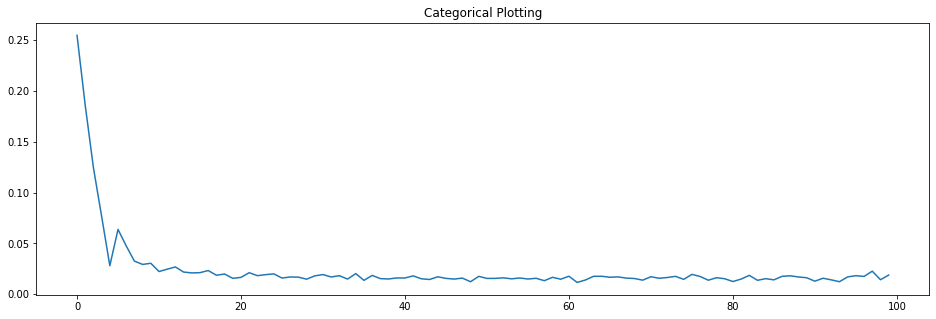

In [7]:
import matplotlib.pyplot as plt

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.figure(figsize=(16,5))
plt.plot(hist['epoch'],hist['loss'])

plt.title('Categorical Plotting')

In [8]:
 train[-n_input:]

array([[0.39168296],
       [0.57064155],
       [0.34938688],
       [0.56868669],
       [0.50115514],
       [0.56531011],
       [0.81073396],
       [0.51235116],
       [1.        ],
       [0.63266394],
       [0.82104141],
       [0.93762218]])

In [9]:
 train[-n_input:].shape

(12, 1)

In [10]:
pred_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))

In [11]:
batch.shape

(1, 12, 1)

In [12]:
batch[0]

array([[0.39168296],
       [0.57064155],
       [0.34938688],
       [0.56868669],
       [0.50115514],
       [0.56531011],
       [0.81073396],
       [0.51235116],
       [1.        ],
       [0.63266394],
       [0.82104141],
       [0.93762218]])

In [13]:
# for i in range(n_input):
for i in range(100):
    print('----------------------%d------------------------------', i)
    
    pred_list.append(model.predict(batch)[0]) 
    print(pred_list)
#     print(pred_list.shape)
    print('----------------------------------------------------')
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    print(batch)
    print(batch.shape)
    print('----------------------------------------------------')

----------------------%d------------------------------ 0
[array([0.856467], dtype=float32)]
----------------------------------------------------
[[[0.57064155]
  [0.34938688]
  [0.56868669]
  [0.50115514]
  [0.56531011]
  [0.81073396]
  [0.51235116]
  [1.        ]
  [0.63266394]
  [0.82104141]
  [0.93762218]
  [0.85646701]]]
(1, 12, 1)
----------------------------------------------------
----------------------%d------------------------------ 1
[array([0.856467], dtype=float32), array([0.9133817], dtype=float32)]
----------------------------------------------------
[[[0.34938688]
  [0.56868669]
  [0.50115514]
  [0.56531011]
  [0.81073396]
  [0.51235116]
  [1.        ]
  [0.63266394]
  [0.82104141]
  [0.93762218]
  [0.85646701]
  [0.9133817 ]]]
(1, 12, 1)
----------------------------------------------------
----------------------%d------------------------------ 2
[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32)]
--------------------

[[[1.25249326]
  [1.31023812]
  [1.41759968]
  [1.48815262]
  [1.61416864]
  [1.73569298]
  [1.86760831]
  [2.04108095]
  [2.24251437]
  [2.48360395]
  [2.77272701]
  [3.1289711 ]]]
(1, 12, 1)
----------------------------------------------------
----------------------%d------------------------------ 18
[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32)]
-----------------------------------

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

[array([0.856467], dtype=float32), array([0.9133817], dtype=float32), array([0.96056235], dtype=float32), array([1.0341651], dtype=float32), array([1.0985407], dtype=float32), array([1.1736242], dtype=float32), array([1.2524933], dtype=float32), array([1.3102381], dtype=float32), array([1.4175997], dtype=float32), array([1.4881526], dtype=float32), array([1.6141686], dtype=float32), array([1.735693], dtype=float32), array([1.8676083], dtype=float32), array([2.041081], dtype=float32), array([2.2425144], dtype=float32), array([2.483604], dtype=float32), array([2.772727], dtype=float32), array([3.128971], dtype=float32), array([3.5805109], dtype=float32), array([4.166785], dtype=float32), array([4.968909], dtype=float32), array([6.089144], dtype=float32), array([7.764154], dtype=float32), array([10.388705], dtype=float32), array([14.80795], dtype=float32), array([22.733305], dtype=float32), array([37.427917], dtype=float32), array([64.473816], dtype=float32), array([112.30841], dtype=floa

In [14]:
batch.shape

(1, 12, 1)

In [25]:
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,100) ]

In [26]:
add_dates

[Timestamp('1903-12-01 00:00:00'),
 Timestamp('1904-01-01 00:00:00'),
 Timestamp('1904-02-01 00:00:00'),
 Timestamp('1904-03-01 00:00:00'),
 Timestamp('1904-04-01 00:00:00'),
 Timestamp('1904-05-01 00:00:00'),
 Timestamp('1904-06-01 00:00:00'),
 Timestamp('1904-07-01 00:00:00'),
 Timestamp('1904-08-01 00:00:00'),
 Timestamp('1904-09-01 00:00:00'),
 Timestamp('1904-10-01 00:00:00'),
 Timestamp('1904-11-01 00:00:00'),
 Timestamp('1904-12-01 00:00:00'),
 Timestamp('1905-01-01 00:00:00'),
 Timestamp('1905-02-01 00:00:00'),
 Timestamp('1905-03-01 00:00:00'),
 Timestamp('1905-04-01 00:00:00'),
 Timestamp('1905-05-01 00:00:00'),
 Timestamp('1905-06-01 00:00:00'),
 Timestamp('1905-07-01 00:00:00'),
 Timestamp('1905-08-01 00:00:00'),
 Timestamp('1905-09-01 00:00:00'),
 Timestamp('1905-10-01 00:00:00'),
 Timestamp('1905-11-01 00:00:00'),
 Timestamp('1905-12-01 00:00:00'),
 Timestamp('1906-01-01 00:00:00'),
 Timestamp('1906-02-01 00:00:00'),
 Timestamp('1906-03-01 00:00:00'),
 Timestamp('1906-04-

In [27]:
r=0
for ii in add_dates:
    r=r+1
print(r)

100


In [28]:
column = df.columns
column

Index(['Sales'], dtype='object')

In [40]:
future_dates = pd.DataFrame(index=add_dates[0:],columns=df.columns)

In [41]:
future_dates

,Sales
1903-12-01,NaN
1904-01-01,NaN
1904-02-01,NaN
1904-03-01,NaN
1904-04-01,NaN
...,...
1911-11-01,NaN
1911-12-01,NaN
1912-01-01,NaN
1912-02-01,NaN


In [31]:
pred_list

[array([0.856467], dtype=float32),
 array([0.9133817], dtype=float32),
 array([0.96056235], dtype=float32),
 array([1.0341651], dtype=float32),
 array([1.0985407], dtype=float32),
 array([1.1736242], dtype=float32),
 array([1.2524933], dtype=float32),
 array([1.3102381], dtype=float32),
 array([1.4175997], dtype=float32),
 array([1.4881526], dtype=float32),
 array([1.6141686], dtype=float32),
 array([1.735693], dtype=float32),
 array([1.8676083], dtype=float32),
 array([2.041081], dtype=float32),
 array([2.2425144], dtype=float32),
 array([2.483604], dtype=float32),
 array([2.772727], dtype=float32),
 array([3.128971], dtype=float32),
 array([3.5805109], dtype=float32),
 array([4.166785], dtype=float32),
 array([4.968909], dtype=float32),
 array([6.089144], dtype=float32),
 array([7.764154], dtype=float32),
 array([10.388705], dtype=float32),
 array([14.80795], dtype=float32),
 array([22.733305], dtype=float32),
 array([37.427917], dtype=float32),
 array([64.473816], dtype=float32),
 a

In [39]:

np.asarray(pred_list).shape

(100, 1)

In [42]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-100:].index, columns=['Prediction'])

In [43]:
df_predict

,Prediction
1903-12-01,6.012340e+02
1904-01-01,6.332599e+02
1904-02-01,6.598084e+02
1904-03-01,7.012247e+02
1904-04-01,7.374488e+02
...,...
1911-11-01,1.752164e+20
1911-12-01,3.233612e+20
1912-01-01,5.978645e+20
1912-02-01,1.093137e+21


In [45]:
df_proj = pd.concat([df,df_predict], axis=1)
df_proj

,Sales,Prediction
1901-01-01,266.0,NaN
1901-02-01,145.9,NaN
1901-03-01,183.1,NaN
1901-04-01,119.3,NaN
1901-05-01,180.3,NaN
...,...,...
1911-11-01,NaN,1.752164e+20
1911-12-01,NaN,3.233612e+20
1912-01-01,NaN,5.978645e+20
1912-02-01,NaN,1.093137e+21


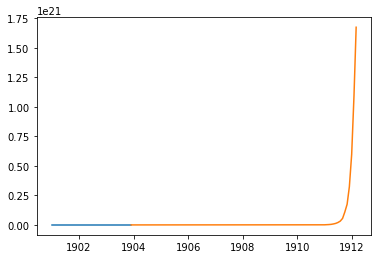

In [46]:
plt.plot(df_proj)